### Predictive Modeling

Modeling Notebook Outline:
1.
2.
3.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Import function from preprocessing
from data_preprocessing import train_val_test

In [3]:
#Import packges for modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
import os
cwd = os.getcwd()

In [5]:
model_data = pd.read_csv(cwd + '/data/model_data.csv', index_col=0)

In [6]:
model_data.head()

,Season,Gender,Age,Height,Entered,Finalist,Loyalty,Ireland,Islands,Midlands,NFR,North,Scotland,South,Wales
Name,,,,,,,,,,,,,,,
Malia Arkian,2,False,26,66,7,False,0.300598,False,False,True,False,False,False,False,False
Ben Porter,1,True,24,71,32,False,0.300598,False,False,False,False,True,False,False,False
Poppy Farnan,1,False,22,66,32,False,0.300598,False,False,False,False,False,False,True,False
Oliver Maxwell Fernandez,2,True,25,74,30,False,0.300598,False,False,False,False,False,False,True,False
Shannon Singh,7,False,22,68,1,False,0.300598,False,False,False,False,False,True,False,False


In [7]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, Malia Arkian to Wes Nelson
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    295 non-null    int64  
 1   Gender    295 non-null    bool   
 2   Age       295 non-null    int64  
 3   Height    295 non-null    int64  
 4   Entered   295 non-null    int64  
 5   Finalist  295 non-null    bool   
 6   Loyalty   295 non-null    float64
 7   Ireland   295 non-null    bool   
 8   Islands   295 non-null    bool   
 9   Midlands  295 non-null    bool   
 10  NFR       295 non-null    bool   
 11  North     295 non-null    bool   
 12  Scotland  295 non-null    bool   
 13  South     295 non-null    bool   
 14  Wales     295 non-null    bool   
dtypes: bool(10), float64(1), int64(4)
memory usage: 16.7+ KB


Text(0.5, 1.0, 'Feature Correlation with Finalist')

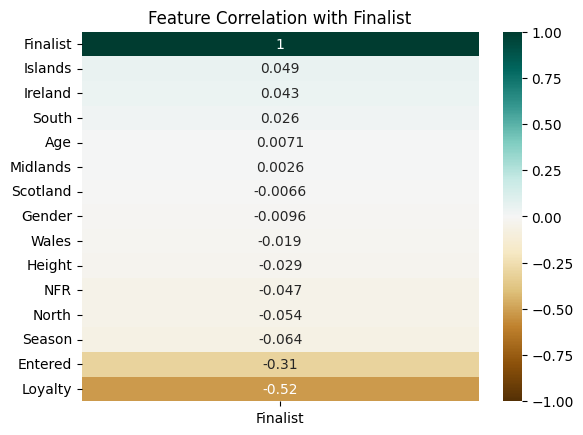

In [8]:
heatmap = sns.heatmap(model_data.corr()
                      [['Finalist']].sort_values(by='Finalist', ascending=False), vmin=-1,
                       vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Feature Correlation with Finalist')

Loyalty and Entered are negatively correlated with being a finalist.
- The earlier you enter, and the lower your loyalty score(more loyal) gives a higher chance of reaching the finale.

I know from analyis that height and age should be more expressive than shown here.

Based on what I see here, a regression model may not perform as well as other types of models (ie decision tree) unless i am able to account for an interaction between gender and height/age

Will have to set interaction terms to accurately reflect outcome in a linear model - - - - 
https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/#:~:text=By%20using%20interaction%20terms%2C%20you,data%20and%20better%20predictive%20performance.

Interaction Terms - Do any of my features affect the outcome of another feature?
- Height: interacts with gender, I need to make sure that when the model looks at a contestants height, it takes into account their gender to  determine how height affects the prediction
- Age: interacts with gender, Age has a different effect on men vs women on the outcome

So really, Gender  has no effect on outcome by itself, there will be 4 winners of each gender on any given season
- Gender does, however, have an effect on how height and age will be interpreted by the model,  so i need to set interaction terms between height/age and gender

### Use my imported datasplit function

In [9]:
x_train, y_train, x_validate, y_validate, x_test, y_test = train_val_test(model_data, 'Finalist') 

Train Split:  (224, 14) | Validate Split:  (36, 14) | Test Split:  (35, 14)


In [ ]:
#Create a for loop to set season to an index for all of these sets of data

In [10]:
x_train.head()

,Season,Gender,Age,Height,Entered,Loyalty,Ireland,Islands,Midlands,NFR,North,Scotland,South,Wales
Name,,,,,,,,,,,,,,
Malia Arkian,2,False,26,66,7,0.300598,False,False,True,False,False,False,False,False
Ben Porter,1,True,24,71,32,0.300598,False,False,False,False,True,False,False,False
Poppy Farnan,1,False,22,66,32,0.300598,False,False,False,False,False,False,True,False
Oliver Maxwell Fernandez,2,True,25,74,30,0.300598,False,False,False,False,False,False,True,False
Shannon Singh,7,False,22,68,1,0.300598,False,False,False,False,False,True,False,False


In [11]:
y_train.head()

Name
Malia Arkian                False
Ben Porter                  False
Poppy Farnan                False
Oliver Maxwell Fernandez    False
Shannon Singh               False
Name: Finalist, dtype: bool

Seasons typically start with 11 islanders on episode 1. 5 initial couples and one bombshell. 
People are periodically added and they are usually 7  to 9 couples with 1 - 3 additional singles. Therefore there are roughly 15 - 21 contestants on at any given time. I am looking for the top 8 (4  from each gender)
I am predicting the 8 most probable islanders to make finals. I can either take their score as is, or then match go a step further and evaluate current couples likelihood.

Model types i want to try

logistic - https://medium.com/@ashishmishra2k19/logistic-regression-the-baseline-classification-model-explained-89915f5b13b2
- has some drawbacks for my specific case - it assumes a linear relationship between features, is sensitive to outliers, and  cant automatically learn features  like tree based models
- no need to scale features 
- Some features are not linearly correlated, but still are important indicators, so this may not be very accurate

decison tree
- better at dealing with features that dont have a strong linear correlation to target

random forest
- similar to decision tree

### Modeling

Produce a predictive model that outperforms baseline in predicting the  target variable - "Finalist".

Ready to model the data. Goal of model is to identify the relationship between the target variable (Finalist or not) with the predictive variables in the data (Age, Height, Day Entered, etc..) using supervised learning. This is a classification and regression problem so some useful models to implement may include the following:

- Logistic Regression 
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree 
- Random Forrest 
- Perceptron Artificial neural network
- RVM or Relevance Vector Machine

Will have to split data into  dataframes and process slightly differently for some types of models

# Baseline Model
What is the simplest model I can think of?
If I looked at the dataset and randomly selected who I thought were finalists, how well would I perform? <br>
- n = 295 contestants
- f = 72 finalists

On average, how many finalists will i correctly pick if 72 are selected at random?

In [12]:
#Formula for expected value baseline - sanity check 
n = 295
f = 72
expected_value = f * (f/n)

print(f"Correct predictions if Finalists were chosen as random: {expected_value}")

Correct predictions if Finalists were chosen as random: 17.572881355932203


Therefore, my bare minimum threshold for a model is to correctly predict ~17.5 finalists correctly. <br>
Any worse than this and my model performs worse than a blind pick.

In [13]:
## Use dummy classifer for another sanity check - just need to beat this metric 
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(x_train, y_train)
y_pred = dummy.predict(x_validate)
dc_accuracy = accuracy_score(y_pred, y_validate)

print(dc_accuracy)

0.7222222222222222


Let's step up the level of complexity and use a logistic regression model. <br>
This can serve as a baseline that requires a higher level of accuracy for other models I implement.

#How to leave name column in so i know who is being predicted as Finalist? or just drop Name column? Below is how
#https://stackoverflow.com/questions/57400005/reattach-id-column-to-data-after-passing-through-sklearn-model
#https://stackoverflow.com/questions/48653977/ignore-a-column-while-learning-but-keep-it-for-later-reference-in-sklearn

In [38]:
#Logistic Regression - Likely wont be very well suited to this problem unless i scale the data and do some further feature engineering
# Will have to do some feature engineering to account for feature interactions -- Interaction terms? patsy? no way for scikit to choose specific interactions
# max_iter=422 is threshold to stop  error but this is easy way out --- I will look at scaling in future versions but for now i will just increase max_iter
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_validate)
log_accuracy = accuracy_score(y_pred, y_validate)

print(log_accuracy)

0.8055555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80% logreg accuracy seems kinda high - is there too much correlation?

In [15]:
#Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_validate)
random_forest_accuracy = accuracy_score(y_pred, y_validate)

print(random_forest_accuracy)

0.8888888888888888


94% is amazing but could also raise some concerns... if this is real then great, but my guess is that there is some tuning that needs to be  done that may bring this down a bit. <br>
Model is partly highly accuate because if ur loyalty score is 1 then ur WAY outside normal range and immediatly excluded.
- number of people with loyalty score of 1 is (0 couples) is 62 -- 63/294 = 21% of contestants are automatically thrown out because of loyalty score. 
- sometimes new contestants will enter and have 0 couples, I need to effectivly check their probabiloty of winning without it being ruined by a loyalty score.
- if you have a length  of stay less than 7 days (meaning you havent been through a recoupling) AND your number of couples is zero, can i give you some value for loyalty that wont ruin the models assesment of them?

In [16]:
#Decision Tree
decision_tree = tree.DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_validate)
decision_tree_accuracy = accuracy_score(y_pred, y_validate)

print(decision_tree_accuracy)

0.8055555555555556


In [17]:
perceptron = Perceptron(random_state=42)
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_validate)

perceptron_accuracy = accuracy_score(y_pred, y_validate)

print(perceptron_accuracy)

0.7222222222222222


In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_validate)
knn_accuracy = accuracy_score(y_pred, y_validate)

print(knn_accuracy)

0.6388888888888888


In [19]:
# Rank models
ranking = pd.DataFrame({
    'Model Type': ['Dummy Classifier', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Perceptron', 'KNeightbors'],
    'Accuracy_Score': [dc_accuracy, log_accuracy, random_forest_accuracy, decision_tree_accuracy, perceptron_accuracy, knn_accuracy]
})

ranking_df = ranking.sort_values(by='Accuracy_Score', ascending=False)
ranking_df = ranking_df.set_index('Accuracy_Score')
ranking_df.head(6)

,Model Type
Accuracy_Score,
0.888889,Random Forest
0.805556,Logistic Regression
0.805556,Decision Tree
0.722222,Dummy Classifier
0.722222,Perceptron
0.638889,KNeightbors


In [22]:
# LOOKS like random forest performs the best - now do some cross validation on random forest model to see performance on multiple folds of data

In [41]:
# Random Forest Cross Validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73913043 0.73913043 0.82608696 0.82608696 0.90909091 0.77272727
 0.63636364 0.72727273 0.81818182 0.54545455]
Mean: 0.7539525691699603
Standard Deviation: 0.0986926129069302


This is somewhat more in line with reality - my model will likely not have a ~90% success rate in selecting winners. <br>
Above it shows average model accuracy using 10 folds and the standard deviation which shows the variation between these scores. <br>
I'd like to get score higher and the standard deviation lower if possible

This performs worse than log reg now - Why is logreg working so well???

In [23]:
# ranking importance of features for model when using randomf forest
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Loyalty,0.432
Height,0.137
Entered,0.133
Age,0.105
Season,0.090
Gender,0.023
South,0.018
Ireland,0.016
Midlands,0.015


Looks like location doesnt have much impact on who wins, I will probably drop this altogether on a new iteration of the model
I also need  to make sure season is not incorporated into the model - it needs to be dropped after splitting data
Loyalty is most important by a wide margin - should i try and scale this feature differently?
Should i incorporate any other features that were dropped or engineer new features?

In [ ]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

# this link helps for this part of messing with paramaters and determining accuracy